In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
data = pd.read_csv('Classified Data', index_col = 0)#hidden feature column names and a target class column

in interviews, you might get classified data from a company to protect customers privacy. 

we'll use **knn** to create a model that directly predicts a class for a new data point based off of the features

In [8]:
data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


**scaling variables** since the knn algo predicts class of a test observation by identifying the nearest observations, the scale of the variables matter.

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data.drop('TARGET CLASS', axis=1))
scaled_features = scaler.transform(data.drop('TARGET CLASS', axis = 1))
data_features = pd.DataFrame(scaled_features, columns = data.columns[:-1])

In [12]:
data_features.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [13]:
#train-test split
from sklearn.model_selection import train_test_split

X = data_features
y = data['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [14]:
#we're trying to predict whether someone will be inside that target class or not. we'll start with k = 1

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(1)#k=1
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
pred = knn.predict(X_test)

In [18]:
from sklearn.metrics import classification_report

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[134   8]
 [ 11 147]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.95      0.93      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [21]:
#using elbow method to choose a good k value
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

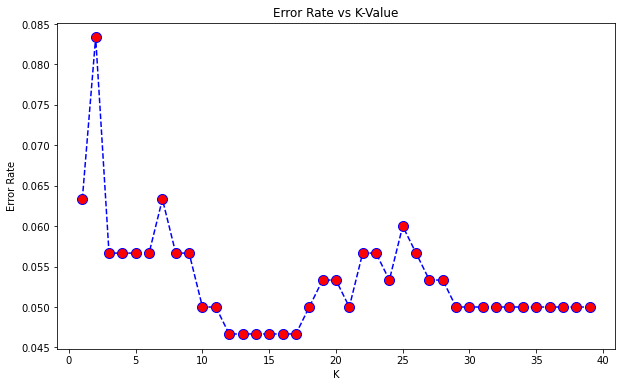

In [24]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K-Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [25]:
#choosing k as 7 due to lower error rate
knn = KNeighborsClassifier(17)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[136   6]
 [  8 150]]


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       142
           1       0.96      0.95      0.96       158

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [ ]:
# we were able to squeeze some more performance out of our model by choosing a better k value

Is KNN better than logistic regression?


It depends on your data and intentions.

Should you be seeking to understand the **relationship** between predictor(s) and your outcome, you should stick with logistic regression. Each predictor’s estimated coefficient will tell you how the odds of the outcome changes on the log scale for a one unit change in the predictor. Standard statistical packages will provide estimated coefficient p-values, confidence intervals, etc. Furthermore, if you wanted to **evaluate effect modification or variable confounding (or some other inferential concept)** logistic regression is the way to go.

**If you want to train a classifier to predict the outcome**, use cross validation to estimate **model performance** on unseen data for both KNN and logistic regression. The **model that performs better**, measured using accuracy, precision, recall, etc. (depends on the problem statement) will be best.

If your data has a **lot of features KNN training and performance may degrade** (see curse of dimensionality). Lastly, if you features are on different measurement scales, you should use some version of pre-processing standardization.